# Deterministic Models and Optimization: Clustering methods, K-Means

**Note**: hand-made kmeans algorithm using synthetic data

In [1]:
import numpy as np
import math
from numpy import random
import pandas as pd
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set_palette("deep")


/Users/polinab/.virtualenvs/base/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#Simulate the data

X1 = np.random.uniform(low= 0, high=25, size=(200))
X2 = np.random.uniform(low=5, high = 30, size=(200))
df = pd.DataFrame({'i': X1, 'j':X2})

In [3]:
df

,i,j
0,18.542326,25.312791
1,19.082330,28.270047
2,10.728402,25.266428
3,17.654207,6.837184
4,16.885052,18.055887
...,...,...
195,23.242684,16.484808
196,15.151056,24.850165
197,19.708785,10.320748
198,15.325743,8.447473


<AxesSubplot:xlabel='i', ylabel='j'>

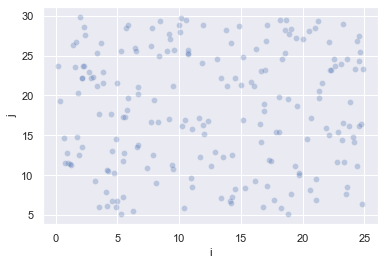

In [4]:
# fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df,x='i', y='j', alpha=0.3)


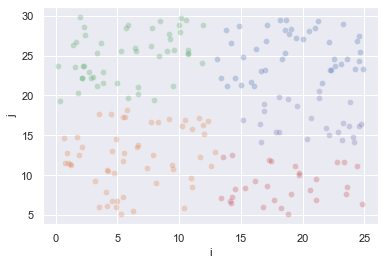

In [5]:
#using package to compare

from sklearn.cluster import KMeans

n = 5

kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
df['sk_label'] = kmeans.labels_

for i in range(n):
    sns.scatterplot(data=df[df.sk_label == i],x='i', y='j', alpha=0.3)


In [6]:
def get_centroids(d,n):
    centroids = []
    for _ in range(n):
        c = np.array((d.sample().values[0][0], d.sample().values[0][1]))
        centroids.append(c)
    return centroids
        

In [7]:
def dist(x,y): 
    return np.linalg.norm(x - y) 


In [8]:
def assign_clusters(d, n, c):
    centroids = c
    assignments = []
    for x in d[['i','j']].to_numpy():
        distances = [dist(x,y) for y in centroids]
        assignments.append(distances.index(min(distances)))
    d['assignments'] = pd.Series(assignments)
    return d

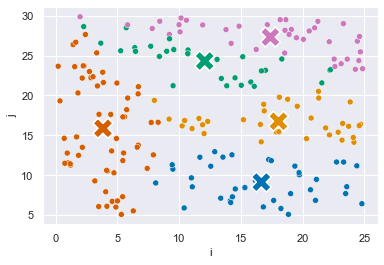

In [9]:
# implementation of 1 run with 5 clusters:
c = get_centroids(df,5)
assigned_df = assign_clusters(df,5,c)
means = assigned_df.groupby('assignments').mean()

g = sns.scatterplot(data=assigned_df,x='i',y='j',hue='assignments',palette='colorblind')
g = sns.scatterplot(data=means,x='i',y='j',hue='assignments',marker='X',s=400,palette='colorblind')
g.legend_.remove()


In [10]:
def means_to_np(m,n): 
    centroids = []
    for i in range(n):
        c = np.array((m.i.values[i], m.j.values[i]))
        centroids.append(c)
    return centroids


In [11]:
# modularizing it into reusable function, and final cluster visualization:
# todo: can also visualize the convergence trail

def mykmeans(d,n):
    c = get_centroids(d,n)
    assigned_df = assign_clusters(d,n,c)
    means = assigned_df.groupby('assignments').mean()
    mpath = means

    reassigned_df = assign_clusters(assigned_df,n,means_to_np(means,n))
    newmeans = reassigned_df.groupby('assignments').mean()

    diff = False
    while diff == False:
        reassigned_df = assign_clusters(d,n,means_to_np(means,n))
        newmeans = reassigned_df.groupby('assignments').mean()
        diff = means.equals(newmeans)
        mpath = mpath.append(newmeans)
        means=newmeans

    return reassigned_df,means,mpath


Text(0.5, 1.0, 'K-Means Clustering Showing "Traveling Means"')

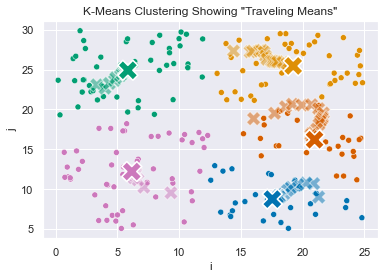

In [19]:
data,m,mpath = mykmeans(df,5)
g = sns.scatterplot(data=data,x='i',y='j',hue='assignments',palette='colorblind')
g = sns.scatterplot(data=mpath,x='i',y='j',hue='assignments',marker='X',s=200,alpha=0.5,palette='colorblind')
g = sns.scatterplot(data=m,x='i',y='j',hue='assignments',marker='X',s=400,palette='colorblind')
g.legend_.remove()
g.set_title('K-Means Clustering Showing "Traveling Means"')


In [25]:
# with non-synthetic data

synthetic = pd.read_csv('synthetic.txt', sep="    ", header=None)
synthetic.columns = ["i", "j"]

thyroid = pd.read_csv('thyroid.txt', sep="  ", header=None)
thyroid.apply(pd.to_numeric)
thyroid.columns = ['a', 'b','c','d','e']


<ipython-input-25-60a8ef82b1e5>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  synthetic = pd.read_csv('synthetic.txt', sep="    ", header=None)
<ipython-input-25-60a8ef82b1e5>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  thyroid = pd.read_csv('thyroid.txt', sep="  ", header=None)


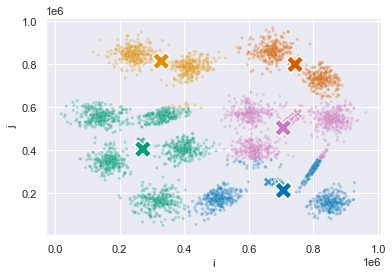

In [14]:
# using synthetic data set. my code only works for 2d data as is
# since i did not access the data initially and i'm not sure how to plot 5d data

sdata,sm,smpath = mykmeans(synthetic,5)
g = sns.scatterplot(data=sdata,x='i',y='j',hue='assignments',alpha=0.3,s=10,palette='colorblind')
g = sns.scatterplot(data=smpath,x='i',y='j',hue='assignments',marker='X',s=100,alpha=0.7,palette='colorblind')
g = sns.scatterplot(data=sm,x='i',y='j',hue='assignments',marker='X',s=300,color='r',palette='colorblind')
g.legend_.remove()


In [139]:





c = get_centroids(thyroid,5)
assigned_df = assign_clusters(thyroid,5,c)

means = assigned_df.groupby('assignments').mean()

euclidean(assigned_df.loc[0].to_numpy(),means.loc[0].to_numpy())
print(c)

reassigned_df = assign_clusters(thyroid,5,means_to_np(means,n))


[array([2130015., 6265419., 3216172., 3068822., 3491697.,       0.]), array([2282159., 2965695., 3497964., 3150548., 2884549.,       0.]), array([2.434303e+06, 1.943845e+06, 3.004828e+06, 3.134203e+06,
       3.082802e+06, 3.000000e+00]), array([4031814., 6691190., 3497964., 3068822., 2872159.,       0.]), array([1.825727e+06, 3.327600e+06, 4.272892e+06, 3.232274e+06,
       3.119974e+06, 2.000000e+00])]


In [142]:
# re-doing functions for 5 columns 
# (did not have access to this data at first so did not realize I need to adapt to more than 2d)

def means_to_np(m,n): 
    mean_array = [np.array(row) for row in m.to_numpy()]
    return mean_array

def get_centroids(d,n):
    centroids = []
    for _ in range(n):
        c = np.array([])
        for i in range(len(d.columns)):
            c = np.append(c, d.sample().values[0][i])
        centroids.append(c)
    return centroids

def euclidean(a, b):
    return sum((p-q)**2 for p, q in zip(a, b)) ** .5

def assign_clusters(d, n, c):
    centroids = c
    assignments = []
    for x in d[[col for col in d.columns]].to_numpy():
        distances = [euclidean(x,y) for y in centroids]
        assignments.append(distances.index(min(distances)))
    d['assignments'] = pd.Series(assignments)
    return d

def mykmeans(d,n):
    c = get_centroids(d,n)
    assigned_df = assign_clusters(d,n,c)
    means = assigned_df.groupby('assignments').mean()

    reassigned_df = assign_clusters(d,n,means_to_np(means,n))
    newmeans = reassigned_df.groupby('assignments').mean()

    diff = False
    while diff:
        reassigned_df = assign_clusters(d,n,means_to_np(means,n))
        newmeans = reassigned_df.groupby('assignments').mean()
        diff = means.equals(newmeans)
        means=newmeans

    return reassigned_df,means

tdata,tm = mykmeans(thyroid,5)

print(tm)


                        a             b             c             d  \
assignments                                                           
0            3.459037e+06  3.577302e+06  3.506252e+06  3.119973e+06   
1            4.172255e+06  2.173106e+06  3.015666e+06  4.348772e+06   
2            1.435225e+06  5.877968e+06  5.846232e+06  3.097154e+06   
3            3.316921e+06  2.751271e+06  2.885151e+06  3.624754e+06   
4            4.436197e+06  4.238526e+06  3.420100e+06  3.175496e+06   

                        e  
assignments                
0            3.116330e+06  
1            6.117589e+06  
2            2.862246e+06  
3            3.396303e+06  
4            3.164972e+06  
